## Nigeria-Crime-Trends Project
##### Date: October 2024

In [1]:
# Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import necessary libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, cross_validate

import pickle

# Set display options to show full dataset
pd.set_option('display.max_rows', None)   # Show all rows
pd.set_option('display.max_columns', None) # Show all columns
pd.set_option('display.width', None)      # Do not truncate output

import warnings
warnings.filterwarnings("ignore")

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load the dataset
df = pd.read_csv("data/Nigeria_1997-2024_Sep20.csv")

In [3]:
# Print the first 5 rows of the dataset
df.head()

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,inter2,interaction,civilian_targeting,iso,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
0,NIG38575,2024-09-20,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),Refugees/IDPs (Nigeria),6,NaN,NaN,0,60,NaN,566,Western Africa,Nigeria,Borno,Maiduguri Metro,NaN,Bolori,11.8826,13.0890,1,Whatsapp,New media,"On 20 September 2024, IDPs (flood victims) fro...",0,crowd size=no report,1727134598
1,NIG38585,2024-09-20,2024,2,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),Muslim Group (Nigeria),6,NaN,NaN,0,60,NaN,566,Western Africa,Nigeria,Osun,Ife Central,NaN,Ile-Ife,7.4824,4.5603,1,Daily Trust (Nigeria),National,"Around 20 September 2024 (as reported), hundre...",0,crowd size=hundreds,1727134598
2,NIG38581,2024-09-19,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),NaN,6,NaN,NaN,0,60,NaN,566,Western Africa,Nigeria,Oyo,Ibadan North,NaN,Agodi,7.4035,3.9132,1,Daily Post (Nigeria); Guardian (Nigeria); Saha...,National-Regional,"On 19 September 2024, for a second consecutive...",0,crowd size=hundreds,1727134598
3,NIG38588,2024-09-19,2024,1,Strategic developments,Strategic developments,Disrupted weapons use,Police Forces of Nigeria (2023-),NaN,1,Kaduna Communal Militia (Nigeria),NaN,4,14,NaN,566,Western Africa,Nigeria,Kaduna,Chikun,NaN,Buruku,10.6179,7.2331,1,Daily Post (Nigeria); Nigeria Punch,National,"Weapons seizure: On 19 September 2024, Police ...",0,NaN,1727134598
4,NIG38591,2024-09-19,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),PDP: People's Democratic Party,6,NaN,NaN,0,60,NaN,566,Western Africa,Nigeria,Edo,Etsako East,NaN,Wanno,7.1389,6.5724,1,Vanguard (Nigeria),National,"On 19 September 2024, PDP youths protested at ...",0,crowd size=no report,1727134598


In [4]:
# Print the information about the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38076 entries, 0 to 38075
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   event_id_cnty       38076 non-null  object 
 1   event_date          38076 non-null  object 
 2   year                38076 non-null  int64  
 3   time_precision      38076 non-null  int64  
 4   disorder_type       38076 non-null  object 
 5   event_type          38076 non-null  object 
 6   sub_event_type      38076 non-null  object 
 7   actor1              38076 non-null  object 
 8   assoc_actor_1       10199 non-null  object 
 9   inter1              38076 non-null  int64  
 10  actor2              29525 non-null  object 
 11  assoc_actor_2       8803 non-null   object 
 12  inter2              38076 non-null  int64  
 13  interaction         38076 non-null  int64  
 14  civilian_targeting  14964 non-null  object 
 15  iso                 38076 non-null  int64  
 16  regi

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38076 entries, 0 to 38075
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   event_id_cnty       38076 non-null  object 
 1   event_date          38076 non-null  object 
 2   year                38076 non-null  int64  
 3   time_precision      38076 non-null  int64  
 4   disorder_type       38076 non-null  object 
 5   event_type          38076 non-null  object 
 6   sub_event_type      38076 non-null  object 
 7   actor1              38076 non-null  object 
 8   assoc_actor_1       10199 non-null  object 
 9   inter1              38076 non-null  int64  
 10  actor2              29525 non-null  object 
 11  assoc_actor_2       8803 non-null   object 
 12  inter2              38076 non-null  int64  
 13  interaction         38076 non-null  int64  
 14  civilian_targeting  14964 non-null  object 
 15  iso                 38076 non-null  int64  
 16  regi

### Data Cleaning

In [6]:
# Build a function for data cleaning
def wrangle_data(filepath):
    # Load the dataset
    data = pd.read_csv(filepath)

    # Convert 'event_date' to datetime format
    data['event_date'] = pd.to_datetime(data['event_date'])

    # Extract month and day into new columns and convert them to int64
    data['month'] = data['event_date'].dt.month.astype('int64')
    data['day'] = data['event_date'].dt.day.astype('int64')

    # List of columns to extract for the app interface
    # Note: The feature 'notes' isn't included as it contained a brief summary of the event
    columns_to_extract = ['year', 'month', 'time_precision', 'disorder_type',  'event_type', 
                          'sub_event_type', 'actor1', 'inter1', 'actor2', 'inter2', 'interaction', 
                          'civilian_targeting', 'admin1', 'admin2', 'location', 'geo_precision', 
                          'source', 'source_scale',  'fatalities'
                    ]

    # Create a copy of the dataset with the specified columns
    df = data[columns_to_extract].copy()

    # Replace NaN values in 'civilian_targeting' with 'Not Civilian targeting' as it was recorded that it can be blank
    df['civilian_targeting'] = df['civilian_targeting'].fillna('Not Civilian targeting')

    # Replace NaN values in 'actor2' with 'Not available' as it was recorded that it can be blank
    df['actor2'] = df['actor2'].fillna('Not available')

    # The row 'admin2' or 'admin1' had 1 missing value and had to be dropped because the location was the Gulf of Guinea; international waters
    df = df.dropna(subset=['admin2', 'admin1'])
    
    # Replace source values with counts less than 100 with 'Other'  
    df['source'] = df['source'].replace(df['source'].value_counts()[df['source'].value_counts() < 100].index, 'Other')

    # Replace actor1 values with counts less than 100 with 'Other'
    df['actor1'] = df['actor1'].replace(df['actor1'].value_counts()[df['actor1'].value_counts() < 100].index, 'Other')
    
    # Replace actor2 values with counts less than 100 with 'Other'
    df['actor2'] = df['actor2'].replace(df['actor2'].value_counts()[df['actor2'].value_counts() < 100].index, 'Other')
    
    # Drop duplicates
    df = df.drop_duplicates()

    return df

In [7]:
# specify the data path and implement in the wrangle function
data_path = "../data/Nigeria_1997-2024_Sep20.csv"
df = wrangle_data(data_path)

# Display the first few rows
df.head()

,year,month,time_precision,disorder_type,event_type,sub_event_type,actor1,inter1,actor2,inter2,interaction,civilian_targeting,admin1,admin2,location,geo_precision,source,source_scale,fatalities
0,2024,9,1,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),6,Not available,0,60,Not Civilian targeting,Borno,Maiduguri Metro,Bolori,1,Other,New media,0
1,2024,9,2,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),6,Not available,0,60,Not Civilian targeting,Osun,Ife Central,Ile-Ife,1,Daily Trust (Nigeria),National,0
2,2024,9,1,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),6,Not available,0,60,Not Civilian targeting,Oyo,Ibadan North,Agodi,1,Other,National-Regional,0
3,2024,9,1,Strategic developments,Strategic developments,Disrupted weapons use,Police Forces of Nigeria (2023-),1,Kaduna Communal Militia (Nigeria),4,14,Not Civilian targeting,Kaduna,Chikun,Buruku,1,Daily Post (Nigeria); Nigeria Punch,National,0
4,2024,9,1,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),6,Not available,0,60,Not Civilian targeting,Edo,Etsako East,Wanno,1,Vanguard (Nigeria),National,0


In [8]:
df.shape

(36751, 19)

In [9]:
df.columns

Index(['year', 'month', 'time_precision', 'disorder_type', 'event_type',
       'sub_event_type', 'actor1', 'inter1', 'actor2', 'inter2', 'interaction',
       'civilian_targeting', 'admin1', 'admin2', 'location', 'geo_precision',
       'source', 'source_scale', 'fatalities'],
      dtype='object')

In [10]:
df.month.unique()

array([ 9,  8,  7,  6,  5,  4,  3,  2,  1, 12, 11, 10], dtype=int64)

In [11]:
# check for missing values
df.isnull().sum()

year                  0
month                 0
time_precision        0
disorder_type         0
event_type            0
sub_event_type        0
actor1                0
inter1                0
actor2                0
inter2                0
interaction           0
civilian_targeting    0
admin1                0
admin2                0
location              0
geo_precision         0
source                0
source_scale          0
fatalities            0
dtype: int64

In [12]:
df.shape

(36751, 19)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36751 entries, 0 to 38075
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   year                36751 non-null  int64 
 1   month               36751 non-null  int64 
 2   time_precision      36751 non-null  int64 
 3   disorder_type       36751 non-null  object
 4   event_type          36751 non-null  object
 5   sub_event_type      36751 non-null  object
 6   actor1              36751 non-null  object
 7   inter1              36751 non-null  int64 
 8   actor2              36751 non-null  object
 9   inter2              36751 non-null  int64 
 10  interaction         36751 non-null  int64 
 11  civilian_targeting  36751 non-null  object
 12  admin1              36751 non-null  object
 13  admin2              36751 non-null  object
 14  location            36751 non-null  object
 15  geo_precision       36751 non-null  int64 
 16  source              36751 n

In [14]:
# exploring the count of the target variable
df['fatalities'].value_counts()

fatalities
0       19770
1        5838
2        2673
3        2184
4        1000
5         865
10        781
6         516
7         429
8         304
20        252
9         213
11        187
12        167
15        151
13        104
17        101
14         94
18         86
30         83
16         80
19         61
25         56
21         48
50         48
100        38
40         38
24         37
22         32
23         32
27         25
35         23
31         21
29         21
26         20
60         17
28         17
45         17
36         14
43         14
32         13
41         13
37         12
70         12
34         12
33         12
42         11
39         10
56          9
48          9
200         8
44          8
38          6
51          6
82          6
53          5
55          5
59          5
150         5
78          5
47          5
101         5
46          5
52          4
58          4
80          4
400         3
49          3
61          3
54          3
71       

In [15]:
# find unique values in each column
for col in df.columns:
    print(col, df[col].nunique())

year 28
month 12
time_precision 3
disorder_type 4
event_type 6
sub_event_type 24
actor1 29
inter1 8
actor2 27
inter2 9
interaction 43
civilian_targeting 2
admin1 37
admin2 751
location 5115
geo_precision 3
source 41
source_scale 23
fatalities 134


In [16]:
df.dtypes

year                   int64
month                  int64
time_precision         int64
disorder_type         object
event_type            object
sub_event_type        object
actor1                object
inter1                 int64
actor2                object
inter2                 int64
interaction            int64
civilian_targeting    object
admin1                object
admin2                object
location              object
geo_precision          int64
source                object
source_scale          object
fatalities             int64
dtype: object

In [17]:
# function to encode categorical variables into numeric for machine learning 
def preprocess_data(df):
    # Encoding categorical variables
    label_encoders = {}
    for col in df.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le
    return df, label_encoders
df_processed, label_encoders = preprocess_data(df)

df_processed.head()

,year,month,time_precision,disorder_type,event_type,sub_event_type,actor1,inter1,actor2,inter2,interaction,civilian_targeting,admin1,admin2,location,geo_precision,source,source_scale,fatalities
0,2024,9,1,0,2,17,22,6,16,0,60,1,7,458,775,1,28,6,0
1,2024,9,2,0,2,17,22,6,16,0,60,1,29,286,2095,1,14,3,0
2,2024,9,1,0,2,17,22,6,16,0,60,1,30,263,153,1,28,5,0
3,2024,9,1,3,4,7,21,1,10,4,14,1,18,131,867,1,13,3,0
4,2024,9,1,0,2,17,22,6,16,0,60,1,11,200,4918,1,39,3,0


In [18]:
from sklearn.preprocessing import LabelEncoder

def preprocess_data(df):
    # Encoding categorical variables
    label_encoders = {}
    category_mappings = {}
    
    for col in df.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le
        
        # Create a mapping of the original category to the encoded value
        category_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))
    
    return df, label_encoders, category_mappings

# implement the encoding and categorical mapping function
df_processed, label_encoders, category_mappings = preprocess_data(df)

In [19]:
# print few rows of the proccessed data ready for modelling
df_processed.head()

,year,month,time_precision,disorder_type,event_type,sub_event_type,actor1,inter1,actor2,inter2,interaction,civilian_targeting,admin1,admin2,location,geo_precision,source,source_scale,fatalities
0,2024,9,1,0,2,17,22,6,16,0,60,1,7,458,775,1,28,6,0
1,2024,9,2,0,2,17,22,6,16,0,60,1,29,286,2095,1,14,3,0
2,2024,9,1,0,2,17,22,6,16,0,60,1,30,263,153,1,28,5,0
3,2024,9,1,3,4,7,21,1,10,4,14,1,18,131,867,1,13,3,0
4,2024,9,1,0,2,17,22,6,16,0,60,1,11,200,4918,1,39,3,0


In [20]:
# create explanatory variable (X) and response variable (y)
X = df_processed.drop(columns=['fatalities'])
y = df_processed['fatalities']

# split data into train and test sets - 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Scaling numeric features using sklearn StandardScalar
scaler = StandardScaler()

# Fit scaler on the training set and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# instantiate models
model_classes = {
    'Linear Model': LinearRegression(),
    'LassoR': Lasso(), 
    'RidgeR': Ridge(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor()
}


# create a dictionary to store model results
model_result = {}

for model_name, model_method in model_classes.items():
    # Fit the model on the scaled training data
    model_method.fit(X_train_scaled, y_train)
    
    # Make predictions on the scaled test data
    y_pred = model_method.predict(X_test_scaled)
    
    # Calculate performance metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred) 
    rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
    r2score = r2_score(y_test, y_pred)
    
    # Store results
    model_result[model_name] = {
        'MAE': mae, 
        'RMSE Score': rmse,
        'MSE': mse, 
        'R2 Score': r2score
    }

# create a dataframe to store the results
reg_results = pd.DataFrame(model_result).T.reset_index().rename(columns={'index': 'Model'})

# Display the results
reg_results

,Model,MAE,RMSE Score,MSE,R2 Score
0,Linear Model,3.914441,14.699417,216.072857,0.039714
1,LassoR,3.976046,14.880041,221.415611,0.015970
2,RidgeR,3.914390,14.699418,216.072880,0.039714
3,Random Forest,3.500131,15.188569,230.692616,-0.025260
4,Decision Tree,4.150190,20.559157,422.678956,-0.878498
5,Gradient Boosting,3.391089,14.359106,206.183934,0.083663
6,XGBoost,3.671078,15.298696,234.050105,-0.040181


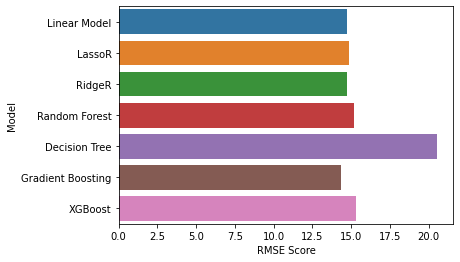

In [21]:
# plot the R2 Score 
sns.barplot(x=reg_results['RMSE Score'], y=reg_results.Model);

From the above result, the Gradient Boosting model has the best overall performance:
- Lowest MAE: 3.39
- Lowest RMSE: 14.35
- Lowest MSE: 206.18
- Highest R2 Score: 0.083

In [22]:
# instantiate the best model
model = GradientBoostingRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

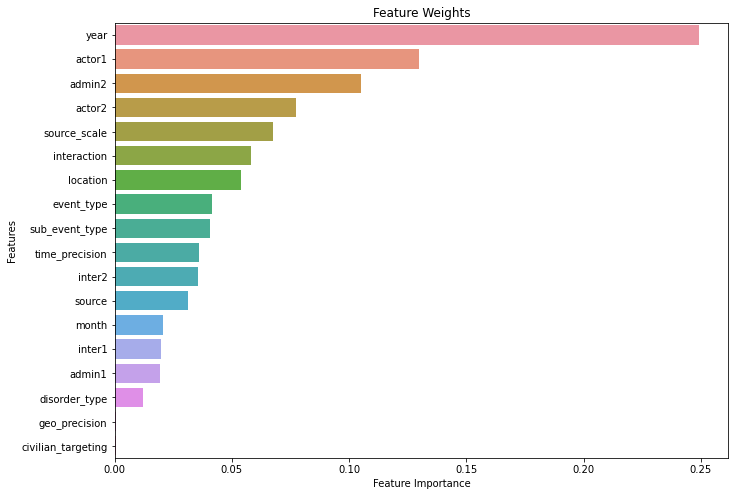

In [23]:
# obtain feature weights for random forest regression
feat_imp = model.feature_importances_

# create a dataframe of feature weight
feat_imp_ = pd.DataFrame(feat_imp, X.columns, columns=["Feature Importance"]).sort_values(by="Feature Importance", ascending=False)

# plot feature weights
plt.figure(figsize=(11,8))
plt.ylabel('Features')
plt.title('Feature Weights')
sns.barplot(x=feat_imp_['Feature Importance'], y=feat_imp_.index);

In [24]:
# Create the folder if it doesn't exist
os.makedirs('pickled_model', exist_ok=True)

# Specify the model filename and path
model_filename = os.path.join('pickled_model', 'finalized_model.sav')

# Save the model to folder
pickle.dump(model, open(model_filename, 'wb'))

print(f"Model saved as {model_filename}")

Model saved as pickled_model\finalized_model.sav
